# ch2 한글 형태소 분석

## 1. 자연어 처리
- 자연어(사람들이 일상적으로 사용 언어) 처리
- 자연어 처리 분야
    - 자연어 이해 : 형태소 분석 -> 의미 분석
    - 자연어 생성 : 대화분석 -> 다음 문장이나 단어 출력
- 활용분야 : 맞춤법검사, 번역기, 키워드 분석, 챗봇

## 2. 자연어 처리 절차
- 전처리 : 단어, 어절 추출
- 분석 후보 생성 : 형태소 분리, 원형 복원, 품사 태깅
- 제약조건(불용어 처리) 규칙 확인
- 분석(현상시각화=워드클라우드, 연관분석, 거리계산, RNN, ...)

## 3. 한글 형태소 분석 엔진
- KoNLPy : Python용 (JPype1 패키지를 의존)
     https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype
    * KOMORAN : 자바로 만든 형태소 분석기
    * HanNanum : 자바
    * Kkma : 서울대학교 형태소 분석
- KoNLP : R용


- 위의 사이트에서 jpype설치 후에 pip install konlpy

In [ ]:
text = """가노라 삼각산아 다시보자 한강수야. 태산이 높다하되 하늘아래 뫼이로다. 
많고 많은 마법사들 중 내가 제일 잘났지"""

### 3.1 HanNanum

In [ ]:
%ls

In [ ]:
! pip install JPype1-1.2.0-cp38-cp38-win_amd64.whl

In [ ]:
from konlpy.tag import Hannanum
han = Hannanum()
han.analyze(text) #형태소 후보 반환

https://konlpy.org 접속 후
user guide -> Comparison between POS tagging classes -> Korean POS tags comparison chart 

In [ ]:
# 형태소 분석만
print(han.morphs(text))

In [ ]:
print(han.nouns(text))

In [ ]:
print(han.pos(text,ntags=9)) # 디폴트가 종류를 9가지로 분류하는 ntags-9

In [ ]:
print(han.pos(text,ntags=22)) 

In [ ]:
#퀴즈 : text 중에서 형용사만 추출
[i[0] for i in han.pos(text,ntags=22) if i[1]=='PA']

In [ ]:
# 퀴즈 : text 중에서 일반명사만 추출
[i[0] for i in han.pos(text,ntags=22) if i[1]=='NC']

### 3.2 Kkma

In [ ]:
text = """가노라 삼각산아 다시보자 한강수야. 태산이 높다하되 하늘아래 뫼이로다. 
많고 많은 마법사들 중 내가 제일 잘났지. 까마귀 검다하되 백로야 웃지마라."""

In [ ]:
from konlpy.tag import Kkma
kkma = Kkma(max_heap_size=1024) # 힙메모리 사이즈 늘릴 때 사용
print(kkma.morphs(text))

In [ ]:
print(kkma.nouns(text))

In [ ]:
# pos tagging
print(kkma.pos(text)) # ntags 디폴트값은 56

In [ ]:
# 보통명사만 추출
tagged_text = kkma.pos(text)
[t[0] for t in tagged_text if t[1]=='NNG']

In [ ]:
from konlpy.tag import Komoran
komoran = Komoran(max_heap_size=1024) # heap memory 늘리기
print(komoran.morphs(text))

In [ ]:
print(komoran.nouns(text))

In [ ]:
print(komoran.pos(text))

## 4. 워드클라우드

In [ ]:
from konlpy.corpus import kolaw
data = kolaw.open('constitution.txt').read()
print(data[:20])
print("%r"%data[:20])

In [ ]:
# 명사들 추출
word_list = komoran.nouns('%r'%data)
print("명사 출현수 : ", len(word_list))
print("출현 명사 갯수 : ", len(set(word_list)))
print('한 단어당 평균 반복 횟수 : ', len(word_list)/len(set(word_list)))
print(type(word_list))
print(word_list[:10])

In [ ]:
# 워드 클라우드 할 text는 리스트를 하나의 연결된 문자로 만들어야 됨. '대한민국 헌법 유구 대한민국'
text = ' '.join(word_list)
text

## 아나콘다 프롬프트에서 pip install WordCloud

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.tag import pos_tag
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
ret = RegexpTokenizer('[\w]{3,}')
emma_tags = pos_tag(ret.tokenize(emma))
nouns_list = [i[0] for i in emma_tags if i[1]=='NN']
wc_emma=' '.join(nouns_list)
wc_emma

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordc=WordCloud()
wordc.generate(wc_emma) #워드클라우드 생성
plt.figure(figsize=(12,10))
plt.imshow(wordc)
plt.axis('off')
plt.show()

In [ ]:
wordc = WordCloud(background_color='white')
wordc.generate(text)
plt.imshow(wordc)

In [ ]:
wordc = WordCloud(background_color='white', max_words=300, font_path='c:/Windows/Fonts/H2PORM.TTF', relative_scaling=0.2)
wordc.generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordc, interpolation='bilinear') #보간법 이용
plt.axis('off')

In [ ]:
# 일반명사
tagged_data=komoran.pos(data)
noun_list=[i[0] for i in tagged_data if i[1]=='NNG']
text=' '.join(noun_list)

In [ ]:
wordc = WordCloud(background_color='white', max_words=300, font_path='c:/Windows/Fonts/H2PORM.TTF', relative_scaling=0.2)
wordc.generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordc, interpolation='bilinear') #보간법 이용
plt.axis('off')

In [ ]:
# 불용어 처리 (불용어 지정 + 불용어 사전)
from wordcloud import STOPWORDS
불용어= STOPWORDS | set(['대통령','때'])
불용어 = set(['대통령','때'])

In [ ]:
wordcloud = WordCloud(background_color='white',
                      max_words=200,
                      font_path='c:/Windows/Fonts/H2PORM.TTF',
                      relative_scaling=0.2,
                      stopwords=불용어)
wordcloud.generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [ ]:
# 마스킹 : 워드클라우드를 지정된 마스크 이미지에 맞도록 생성
from PIL import Image
import numpy as np
img = Image.open('data/south_korea.png').convert('RGBA')
mask = Image.new('RGB', img.size, (0,0,0))
mask.paste(img)
plt.imshow(mask)
mask = np.array(mask)

In [ ]:
wordcloud = WordCloud(background_color='white',
                      max_words=700,
                      font_path='c:/Windows/Fonts/H2PORM.TTF',
                      relative_scaling=0.1,
                      mask=mask,
                      stopwords=불용어
                      )
wordcloud.generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [ ]:
# 생성된 wordcloud 저장
wordcloud.to_file('test3_wc.png')

## 5. 단어 빈도수 시각화

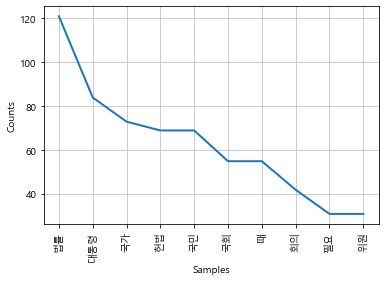

In [2]:
from wordcloud import WordCloud
from konlpy.tag import Kkma
import nltk
import matplotlib.pyplot as plt
from konlpy.tag import Kkma
from konlpy.corpus import kolaw
data = kolaw.open('constitution.txt').read()
kkma = Kkma()
tagged_data=kkma.pos(data)
noun_list = [t[0] for t in tagged_data if t[1]=='NNG']
plt.rc("font",family="Malgun Gothic")
nltk.Text(noun_list).plot(10)

## 6. 워드 임베딩
- 단어간 유사성 도출


In [3]:
# 뉴스 기사 link를 가져와서 웹크롤링 -> 명사 추출 -> 단어간 거리 유사성 출력
import requests
from bs4 import BeautifulSoup
rss_url = 'https://fs.jtbc.joins.com//RSS/economy.xml'
jtbc_economy = requests.get(rss_url)
soup = BeautifulSoup(jtbc_economy.content, 'xml')
link_el = soup.select('item > link')
link_list = [link.text for link in link_el]
link_list

['https://news.jtbc.joins.com/article/article.aspx?news_id=NB12020546',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB12020508',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB12020509',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB12020387',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB12020390',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB12020349',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB12020351',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB12020353',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB12020247',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB12020214',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB12020215',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB12020233',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB12020149',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB120

In [10]:
# 각 link들의 뉴스 기사들 명사만 뽑아라
from konlpy.tag import Kkma
kkma = Kkma()
news=[]
for link in link_list:
    response = requests.get(link)
    news_soup = BeautifulSoup(response.content, 'html.parser')
    title = news_soup.select_one('div.title > h3#jtbcBody').text
    content = news_soup.select_one('div#articlebody').text
    noun_list = kkma.nouns(title+content)
    news.append(noun_list)

In [13]:
print('뉴스당 명사 개수 : ',[len(n) for n in news])

뉴스당 명사 개수 :  [117, 142, 161, 141, 186, 154, 192, 156, 108, 236, 191, 159, 113, 228, 166, 171, 140, 217, 127, 212]


### 워드 임베딩하기(단어간 거리 계산)
- pip install gensim 하기


In [14]:
from gensim.models import Word2Vec
model = Word2Vec(news, window=5, min_count=2, workers=1)

C:\Users\tjoeun\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [15]:
model.wv.most_similar('코로나')

[('실현', 0.3122883141040802),
 ('공정위', 0.23871801793575287),
 ('황', 0.2285536825656891),
 ('소비자', 0.22080081701278687),
 ('가지', 0.21957911550998688),
 ('집', 0.21919037401676178),
 ('지급', 0.2085629254579544),
 ('이하', 0.2041962742805481),
 ('기업', 0.20380844175815582),
 ('증가세', 0.19367653131484985)]

In [17]:
model.wv.most_similar('집',topn=5)

[('보수', 0.29536038637161255),
 ('백만', 0.25872573256492615),
 ('노총', 0.2429419308900833),
 ('국민', 0.22248700261116028),
 ('코로나', 0.21919037401676178)]